# Analytics

**Date: 2021/1**

**SUMMARY:**
    
   * This notebook represents the project quality analysis of the date exposed right above
    
### TEAM:

**Semester: 2021/1**

**Professor: Hilmer Neri**

**Members:**

* Artur
* Eduardo
* Gabriel
* Levi
* Luis
* Joao
* Nícolas

### LIBRARIES

In [40]:
import requests
import json
import utils.constants as CONST
import utils.widgets as WDG
import ipywidgets as widgets
import time
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import os

#### Dataframe Config

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

### **SonarCloud**

**Path to metrics files: ../analytics-raw-data/**

In [3]:
jsons = glob('../analytics-raw-data/*.json')

In [34]:
def read_json(json_):
    
    with open(json_) as json_file:
        json_obj = json.load(json_file)
        
    return json_obj

def create_base_df(json_list):
    
    df = pd.DataFrame()
    
    for i in json_list:
        
        data, file_name = read_json(i)
        
        df_ = pd.DataFrame(data['baseComponent']['measures'])
        
                          
        df_['file_name'] = file_name
                  
        df = df.append(df_, ignore_index=True)
        
    aux_df = df['file_name'].str.split(r'fga-eps-mds-2021_1-PUMA-([a-zA-Z]+)-([\d-]+).json', expand=True)
    
    df['repository'] = aux_df[1]
    
    df['date'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'date']).drop(['file_name'], axis=1)

    return df

In [5]:
df = create_base_df(jsons)

In [6]:
df.head(10)

,metric,value,bestValue,repository,date
8,duplicated_lines_density,0.0,True,AlocateService,10-19-2021-01-08
9,functions,4,NaN,AlocateService,10-19-2021-01-08
10,security_rating,1.0,True,AlocateService,10-19-2021-01-08
11,files,4,NaN,AlocateService,10-19-2021-01-08
12,complexity,9,NaN,AlocateService,10-19-2021-01-08
13,ncloc,204,NaN,AlocateService,10-19-2021-01-08
14,reliability_rating,1.0,True,AlocateService,10-19-2021-01-08
15,comment_lines_density,0.0,False,AlocateService,10-19-2021-01-08
104,duplicated_lines_density,0.0,True,ApiGateway,10-06-2021-15-49
105,functions,21,NaN,ApiGateway,10-06-2021-15-49


In [37]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'security_rating',
               'tests',
               'test_success_density',
               'test_execution_time',
               'reliability_rating']

len(metric_list)

12

In [45]:
def metric_per_file(json):
    
    file_json = []
    
    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)
            
    return file_json

def generate_file_dataframe_per_release(metric_list, json, language_extension):
    
    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)
    
    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass
        
    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

def create_file_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        
        file_component_data = metric_per_file(file_component)

        file_component_df = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = 'js')

        file_component_df['filename'] = os.path.basename(i)

        df = df.append(file_component_df, ignore_index=True)
        
    aux_df = df['filename'].str.split(r"fga-eps-mds-2021_1-PUMA-([a-zA-Z]+)-([\d-]+).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version']).drop(['filename'], axis=1)
        
    return df

In [46]:
file_component = create_file_df(jsons)

In [58]:
dfs = {}
for repo in REPOS:
    dfs[repo] = file_component[file_component['repository'] == repo]

In [59]:
file_component.head(10)

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,repository,version
11,dbconfig/dbConfig.js,3,8,0.0,0.0,NaN,44,1.0,NaN,100.0,NaN,1.0,AlocateService,10-19-2021-01-08
12,dbconfig/dbSchema.js,0,0,0.0,0.0,NaN,146,1.0,NaN,100.0,NaN,1.0,AlocateService,10-19-2021-01-08
13,index.js,1,1,0.0,0.0,NaN,14,1.0,NaN,100.0,NaN,1.0,AlocateService,10-19-2021-01-08
146,src/config/environment.js,1,2,0.0,0.0,NaN,9,1.0,NaN,100.0,NaN,1.0,ApiGateway,10-06-2021-15-49
147,index.js,0,0,0.0,0.0,NaN,11,1.0,NaN,100.0,NaN,1.0,ApiGateway,10-06-2021-15-49
148,src/routes/router.js,10,10,0.0,0.0,NaN,31,1.0,NaN,100.0,NaN,1.0,ApiGateway,10-06-2021-15-49
149,src/routes/userRouter.js,10,10,4.7,0.0,NaN,41,1.0,NaN,100.0,NaN,1.0,ApiGateway,10-06-2021-15-49
85,tests/integrationTests/constants.js,0,0,0.0,0.0,NaN,128,1.0,NaN,100.0,NaN,1.0,ApiGateway,10-19-2021-01-06
86,src/config/environment.js,1,4,0.0,0.0,NaN,17,1.0,NaN,100.0,NaN,1.0,ApiGateway,10-19-2021-01-06
87,index.js,0,0,0.0,0.0,NaN,11,1.0,NaN,100.0,NaN,1.0,ApiGateway,10-19-2021-01-06


In [67]:
def _nloc(df):
    ncloc = 0
    for each in df['ncloc']:
        ncloc += int(each)

    return ncloc

In [49]:
def m1(df):
    return len(df[(df['complexity'].astype(float)/df['functions'].astype(float)) < 10])/len(df)

In [50]:
def m2(df):
    return len(df[(df['comment_lines_density'].astype(float) > 10) &\
                  (df['comment_lines_density'].astype(float) < 30)])/len(df)

In [51]:
def m3(df):
    return len(df[(df['duplicated_lines_density'].astype(float) < 5)])/len(df)

In [52]:
def m4(df):
    return df['test_success_density'].astype(float).median() / 100

In [53]:
def m5(df):
    return len(df[(df['test_execution_time'].astype(float)) < 300]) / sum(df['tests'].astype(float))

In [54]:
def m6(df):
    return len(df[(df['coverage'].astype(float) > 60)]) / len(df)

In [69]:
def create_metrics(df):
    version_vec = df['version'].unique()
    
    m1_list = []
    m2_list = []
    m3_list = []
    m4_list = []
    m5_list = []
    m6_list = []
    
    ncloc_list = []
    repository_list = []
    version_list = []
    
    metrics_df = pd.DataFrame()
    
    for version in version_vec:
        
        version_df = df[df['version'] == version]
        
        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        m4_list.append(m4(version_df))
        m5_list.append(m5(version_df))
        m6_list.append(m6(version_df))
        
        ncloc_list.append(_nloc(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)
    
    metrics_df = pd.DataFrame({
            'm1': m1_list,
            'm2': m2_list,
            'm3': m3_list,
            'm4': m4_list,
            'm5': m5_list,
            'm6': m6_list,
            'repository': repository_list, 
            'version': version_list,
            'ncloc': ncloc_list})
    
    return metrics_df

In [104]:
def plot_metrics(df):
    fig = plt.figure(figsize=(20, 10))
#     ax = subplot(1,1,1)

    plt.plot(df['m1'], linewidth=3, marker='o', markersize=10, label='complexity')
    plt.plot(df['m2'], linewidth=3, marker='o', markersize=10, label='comment lines')
    plt.plot(df['m3'], linewidth=3, marker='o', markersize=10, label='duplicate')
    plt.plot(df['m4'], linewidth=3, marker='o', markersize=10, label='test success')
    plt.plot(df['m5'], linewidth=3, marker='o', markersize=10, label='test execution time')
    plt.plot(df['m6'], linewidth=3, marker='o', markersize=10, label='test coverage')
#     handles, labels = ax.get_legend_handles_labels()
    fig.legend(loc='lower center')

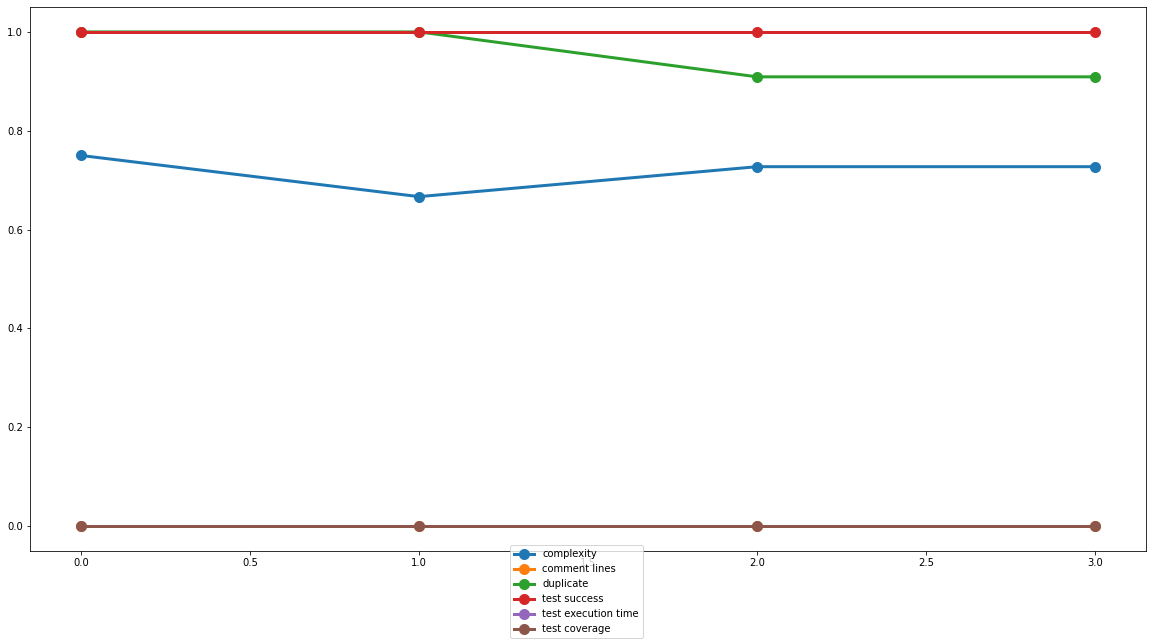

In [109]:
plot_metrics(create_metrics(dfs['ApiGateway']))

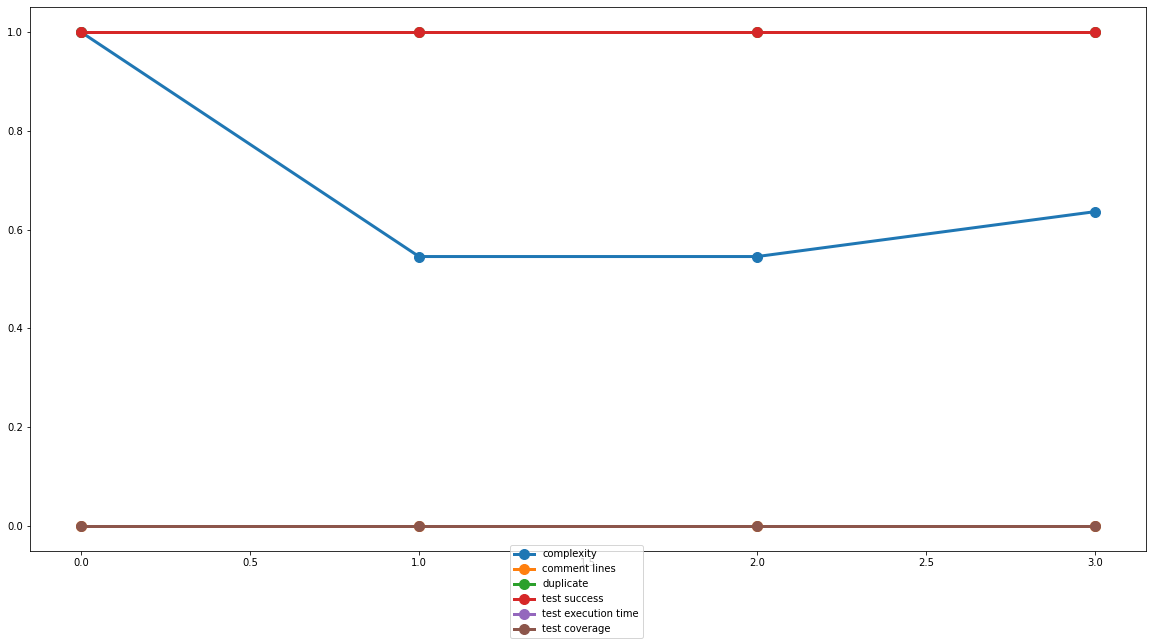

In [110]:
plot_metrics(create_metrics(dfs['UserService']))

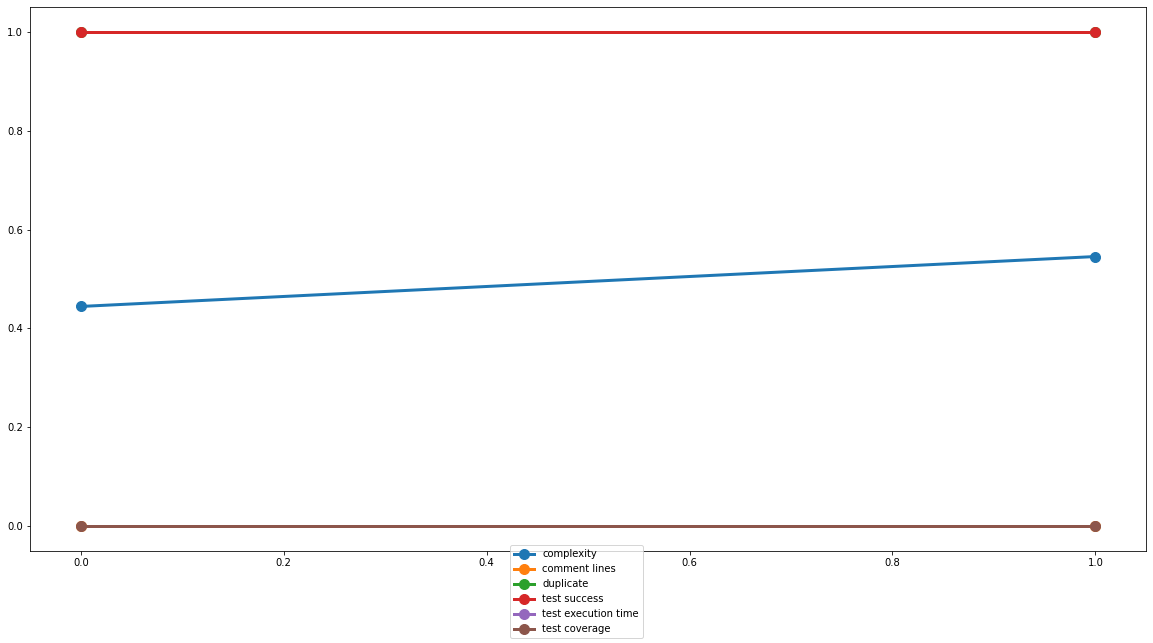

In [111]:
plot_metrics(create_metrics(dfs['ProjectService']))

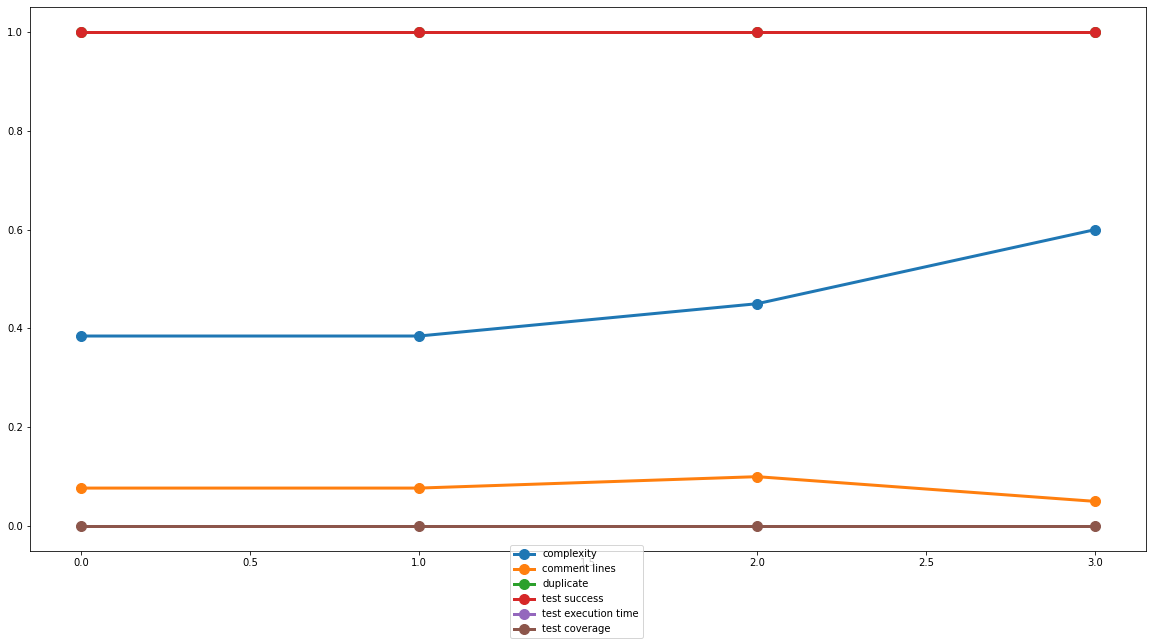

In [114]:
plot_metrics(create_metrics(dfs['Frontend']))